In [45]:
pip install textblob wordcloud


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob    #TextBlob object allows access to built-in methods for sentiment analysis, tokenization, translation, etc.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [3]:
df = pd.read_csv('D:\data science\imdb-movies-dataset.csv')

In [4]:
df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


In [5]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [6]:
df.drop(['Poster','Description'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Review Count         1
Review Title       517
Review             516
dtype: int64

In [8]:
df.dropna(inplace=True)  # Remove rows with missing values

In [9]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...","16,302",109,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...","6,730",20,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...","24,899",112,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...


In [14]:
# Convert votes and rows to numeric
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df['Review Count'] = df['Review Count'].str.replace(',', '').astype(float)


In [15]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...


In [18]:
# Sentiment Labeling
def get_sentiment(text):
    analysis = TextBlob(text)     # A python library for processing textual data
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(get_sentiment)

In [19]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review,Sentiment
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Positive
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Positive
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...,Negative
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Positive
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...,Positive
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...,Positive
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...,Positive
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,Positive


In [20]:
# Encode Sentiment Labels
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])   # converted categorical to numerical positive - 2,negative - 0, neutral - 1


In [21]:
df

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Review Count,Review Title,Review,Sentiment,Sentiment_Label
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,166.0,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Positive,2
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,183.0,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Positive,2
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,333.0,not funny,Pretty much the worst criticism you can lay on...,Negative,0
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,384.0,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Positive,2
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,194.0,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Positive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,The Masque of the Red Death,2020.0,A,89.0,"Drama, Horror",6.9,77.0,Roger Corman,"Vincent Price, Hazel Court, Jane Asher, David ...",16302.0,109.0,Price at his Most Wicked!,Roger Corman has done an outstanding job with ...,Positive,2
9993,South Central,2020.0,R,98.0,"Crime, Drama",6.8,64.0,Stephen Milburn Anderson,"Glenn Plummer, Byron Minns, Lexie Bigham, Vinc...",6730.0,20.0,"""South Central was adapted from my novel ""Sout...",I would like to thank all of the fans and supp...,Positive,2
9994,Mutiny on the Bounty,2020.0,U,132.0,"Adventure, Biography, Drama",7.6,87.0,Frank Lloyd,"Charles Laughton, Clark Gable, Franchot Tone, ...",24899.0,112.0,"Our Favorite ""Mutiny"": April 28, 1789",Although the versions with Marlon Brando and T...,Positive,2
9995,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,128.0,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,Positive,2


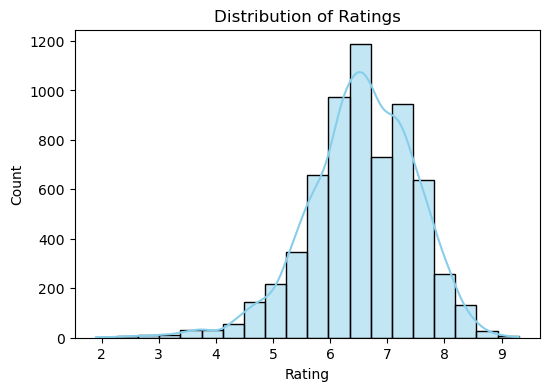

In [23]:
# 1. Rating Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


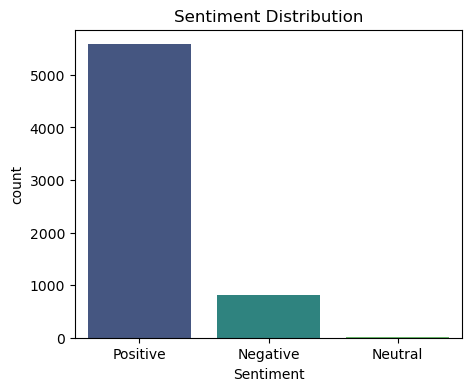

In [26]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


In [36]:
#Feature Extraction
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(df['Review'])
y = df['Sentiment_Label']

In [37]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# --- Class Balancing using Class Weights ---
class_weights = {
    0: len(y) / (3 * sum(y == 0)),
    1: len(y) / (3 * sum(y == 1)),
    2: len(y) / (3 * sum(y == 2))
}


In [39]:
# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 2.6256662566625666,
                                     1: 213.46666666666667,
                                     2: 0.38248820402556294},
                       random_state=42)

In [41]:
# Predictions
y_pred = model.predict(X_test)


In [42]:
# Decode sentiment labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [43]:
# Evaluation
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("\nAccuracy Score:", accuracy_score(y_test_decoded, y_pred_decoded))



Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.08      0.15       168
     Neutral       0.00      0.00      0.00         2
    Positive       0.88      0.99      0.93      1111

    accuracy                           0.87      1281
   macro avg       0.50      0.36      0.36      1281
weighted avg       0.84      0.87      0.83      1281


Confusion Matrix:
 [[  14    0  154]
 [   1    0    1]
 [   7    0 1104]]

Accuracy Score: 0.8727556596409055


C:\Users\SAI DEEPAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAI DEEPAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAI DEEPAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
